In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting

In [3]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")  # Load the dataset
df.head()  # Show first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=False)

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

Text(0.5, 1.0, 'Survival Rate by Gender')

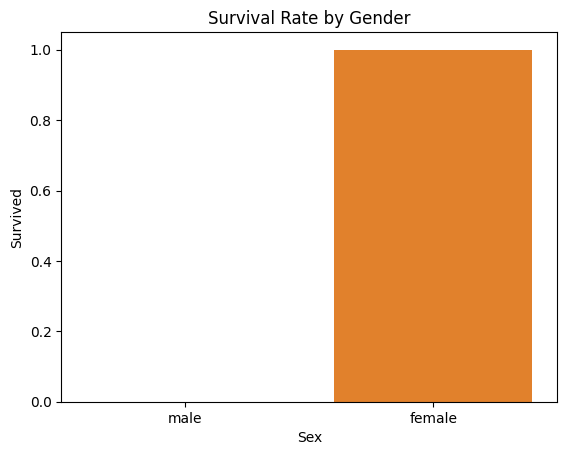

In [6]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

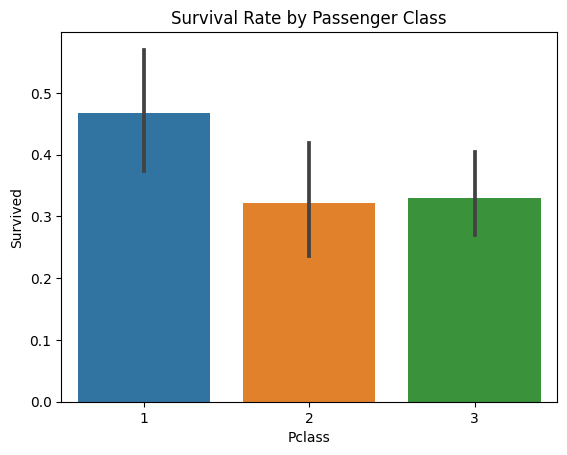

In [7]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution of Survivors vs. Non-Survivors')

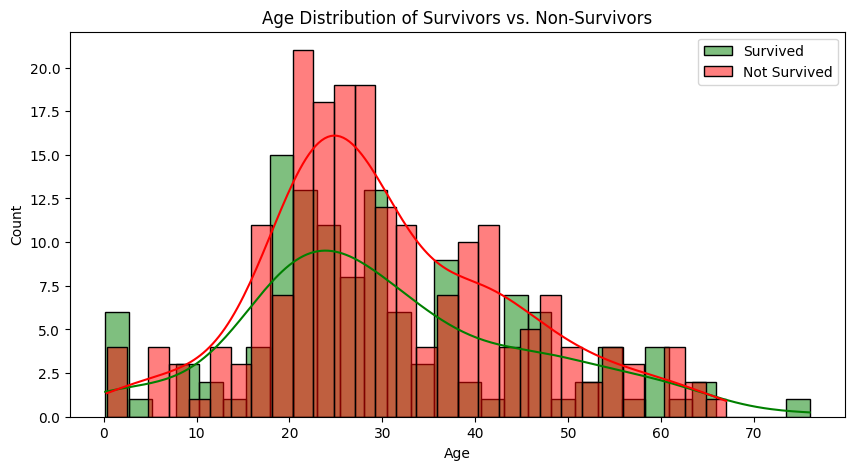

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Survived']==1]['Age'], bins=30, kde=True, color="green", label="Survived")
sns.histplot(df[df['Survived']==0]['Age'], bins=30, kde=True, color="red", label="Not Survived")
plt.legend()
plt.title("Age Distribution of Survivors vs. Non-Survivors")

Text(0.5, 1.0, 'Survival Rate by Family Size')

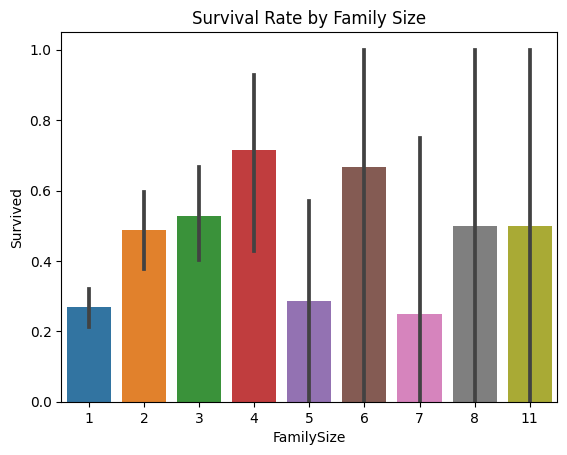

In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")

Text(0.5, 1.0, 'Fare Distribution by Class')

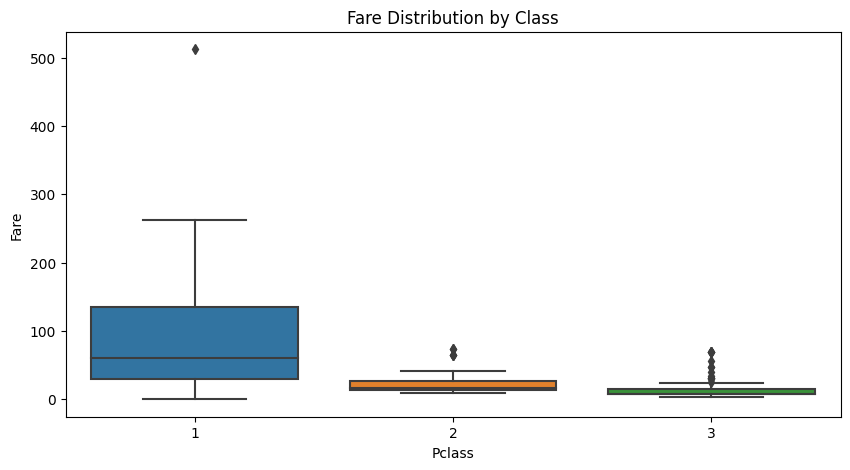

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Class")

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame loaded from the Titanic dataset

# Convert categorical features into numbers
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']
X = df[features].copy()
y = df['Survived'].copy()

# Impute missing 'Age' and 'Fare' values
imputer = SimpleImputer(strategy='mean')
X[['Age', 'Fare']] = imputer.fit_transform(X[['Age', 'Fare']])

# Convert to DataFrame *before* splitting
X = pd.DataFrame(X, columns=features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- CRITICAL CHECKS ---
print("--- Before Training ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train NaNs:", X_train.isnull().sum().sum())  # Total NaNs
print("X_test NaNs:", X_test.isnull().sum().sum())
print("X_train dtypes:\n", X_train.dtypes)
print("X_test dtypes:\n", X_test.dtypes)

# Check for infinite values
print("X_train infs:", (X_train == float('inf')).sum().sum() + (X_train == float('-inf')).sum().sum())
print("X_test infs:", (X_test == float('inf')).sum().sum() + (X_test == float('-inf')).sum().sum())

# Check for very large values
print("X_train max values:\n", X_train.max())
print("X_test max values:\n", X_test.max())
# --- END CRITICAL CHECKS ---

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

--- Before Training ---
X_train shape: (334, 5)
X_test shape: (84, 5)
X_train NaNs: 0
X_test NaNs: 0
X_train dtypes:
 Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
dtype: object
X_test dtypes:
 Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
dtype: object
X_train infs: 0
X_test infs: 0
X_train max values:
 Pclass          3.0000
Sex             1.0000
Age            76.0000
Fare          512.3292
FamilySize     11.0000
dtype: float64
X_test max values:
 Pclass          3.000
Sex             1.000
Age            57.000
Fare          262.375
FamilySize     11.000
dtype: float64
Model Accuracy: 1.00
